In [1]:
import pandas as pd
import numpy as np

In [2]:
covid = pd.read_csv('covid_19_india.csv')

In [3]:
covid.head()

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
0,1,30/01/20,6:00 PM,Kerala,1,0,0,0,1
1,2,31/01/20,6:00 PM,Kerala,1,0,0,0,1
2,3,01/02/20,6:00 PM,Kerala,2,0,0,0,2
3,4,02/02/20,6:00 PM,Kerala,3,0,0,0,3
4,5,03/02/20,6:00 PM,Kerala,3,0,0,0,3


In [4]:
covid.shape

(3207, 9)

In [5]:
covid.isnull().sum()

Sno                         0
Date                        0
Time                        0
State/UnionTerritory        0
ConfirmedIndianNational     0
ConfirmedForeignNational    0
Cured                       0
Deaths                      0
Confirmed                   0
dtype: int64

In [6]:
# covid.isnull()

In [7]:
covid.describe()

,Sno,Cured,Deaths,Confirmed
count,3207.000000,3207.000000,3207.000000,3207.000000
mean,1604.000000,1207.797630,80.843467,2708.188338
std,925.925483,4329.478775,344.717198,9214.799767
min,1.000000,0.000000,0.000000,0.000000
25%,802.500000,1.000000,0.000000,14.000000
50%,1604.000000,32.000000,1.000000,125.000000
75%,2405.500000,486.500000,20.500000,1590.000000
max,3207.000000,60838.000000,5751.000000,120504.000000


In [8]:
covid.groupby(['Date'])['Confirmed', 'Cured', 'Deaths', 'State/UnionTerritory'].min()

,Confirmed,Cured,Deaths,State/UnionTerritory
Date,,,,
01/02/20,2,0,0,Kerala
01/03/20,3,0,0,Kerala
01/04/20,1,0,0,Andaman and Nicobar Islands
01/05/20,1,0,0,Andaman and Nicobar Islands
01/06/20,1,0,0,Andaman and Nicobar Islands
...,...,...,...,...
30/04/20,1,0,0,Andaman and Nicobar Islands
30/05/20,1,0,0,Andaman and Nicobar Islands
31/01/20,1,0,0,Kerala


In [9]:
covid.groupby(['Date'])['Confirmed', 'Cured', 'Deaths', 'State/UnionTerritory'].max()

,Confirmed,Cured,Deaths,State/UnionTerritory
Date,,,,
01/02/20,2,0,0,Kerala
01/03/20,3,0,0,Kerala
01/04/20,302,39,9,West Bengal
01/05/20,10498,1773,459,West Bengal
01/06/20,67655,29329,2286,West Bengal
...,...,...,...,...
30/04/20,9915,1593,432,West Bengal
30/05/20,62228,26997,2098,West Bengal
31/01/20,1,0,0,Kerala


In [10]:
import matplotlib.pyplot as plt

In [11]:
# covid['State/UnionTerritory'].value_counts()

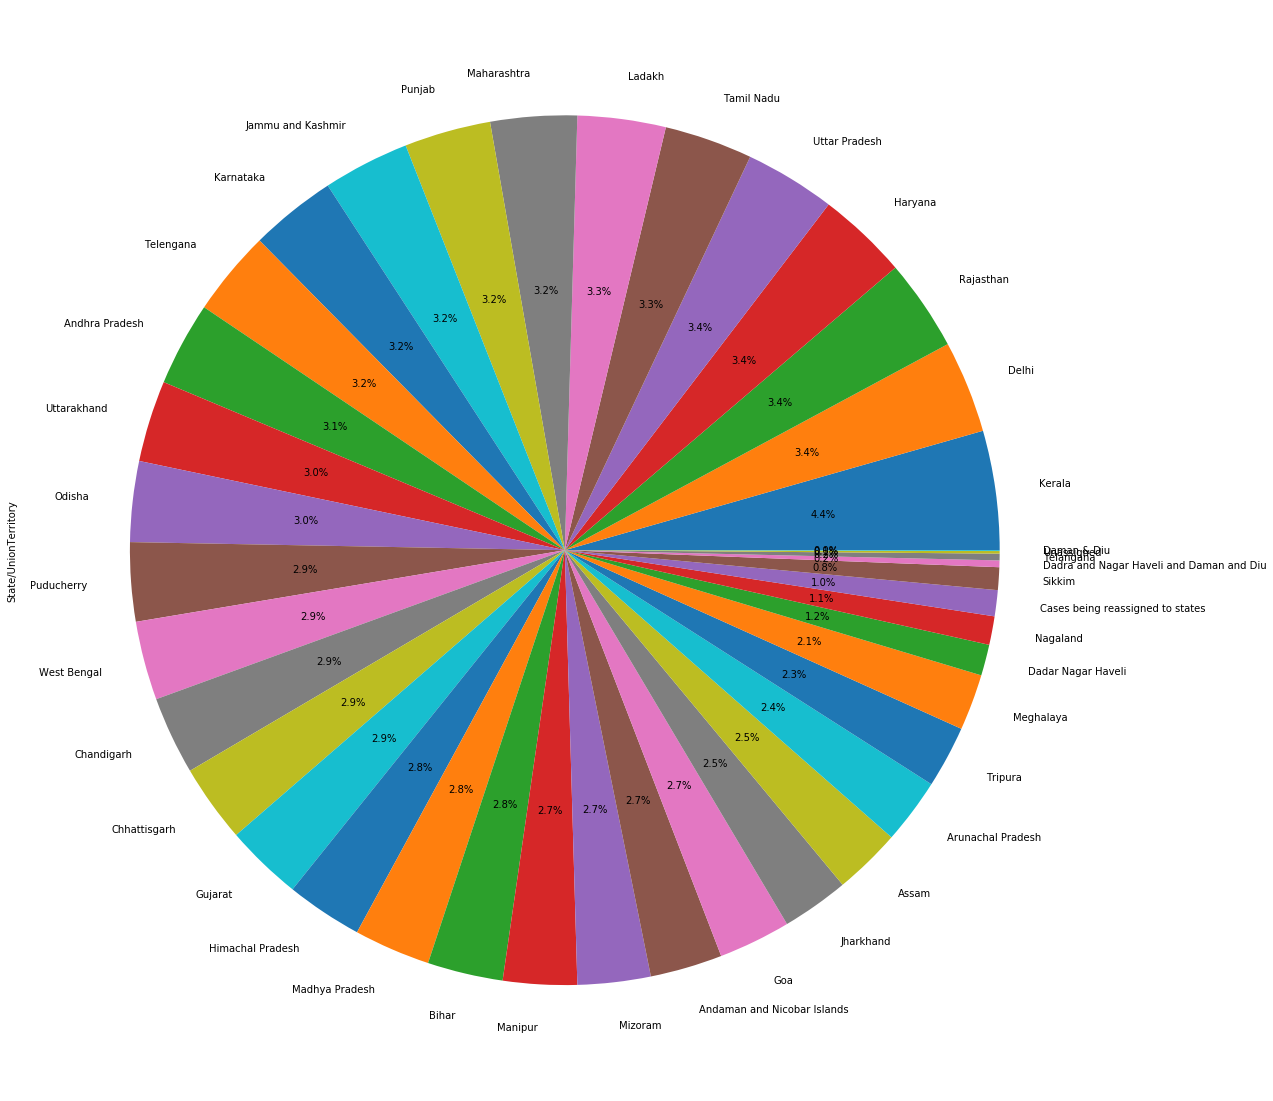

In [12]:
plt.figure(figsize=(30, 20))
covid['State/UnionTerritory'].value_counts().plot.pie(autopct = "%1.1f%%")

In [13]:
covid_per_day = covid.groupby(['Date'])['Confirmed', 'Cured', 'Deaths'].max()

In [14]:
covid_per_day

,Confirmed,Cured,Deaths
Date,,,
01/02/20,2,0,0
01/03/20,3,0,0
01/04/20,302,39,9
01/05/20,10498,1773,459
01/06/20,67655,29329,2286
...,...,...,...
30/04/20,9915,1593,432
30/05/20,62228,26997,2098
31/01/20,1,0,0


In [15]:
# max no of cases
covid_per_day['Confirmed'].max()

120504

In [16]:
covid_per_day['Confirmed'].idxmax()

'19/06/20'

In [17]:
covid_per_day['Confirmed'].idxmin()

'30/01/20'

In [23]:
# covid['State/UnionTerritory'].value_counts()

In [24]:
up = covid[(covid['State/UnionTerritory'] == 'Uttar Pradesh')]

In [25]:
up

,Sno,Date,Time,State/UnionTerritory,ConfirmedIndianNational,ConfirmedForeignNational,Cured,Deaths,Confirmed
39,40,04/03/20,6:00 PM,Uttar Pradesh,6,0,0,0,6
50,51,05/03/20,6:00 PM,Uttar Pradesh,7,0,0,0,7
55,56,06/03/20,6:00 PM,Uttar Pradesh,7,0,0,0,7
58,59,07/03/20,6:00 PM,Uttar Pradesh,7,0,0,0,7
72,73,08/03/20,6:00 PM,Uttar Pradesh,7,0,0,0,7
...,...,...,...,...,...,...,...,...,...
3060,3061,15/06/20,8:00 AM,Uttar Pradesh,-,-,8268,399,13615
3096,3097,16/06/20,8:00 AM,Uttar Pradesh,-,-,8268,399,13615
3132,3133,17/06/20,8:00 AM,Uttar Pradesh,-,-,8610,417,14091
3168,3169,18/06/20,8:00 AM,Uttar Pradesh,-,-,8904,435,14598


In [26]:
d = up.groupby(['Date'])['Confirmed', 'Cured', 'Deaths'].max()

In [27]:
d

,Confirmed,Cured,Deaths
Date,,,
01/04/20,103,14,2
01/05/20,2281,555,41
01/06/20,7823,4709,213
02/04/20,113,14,2
02/05/20,2328,654,42
...,...,...,...
30/03/20,82,11,0
30/04/20,2203,513,39
30/05/20,7284,4244,198


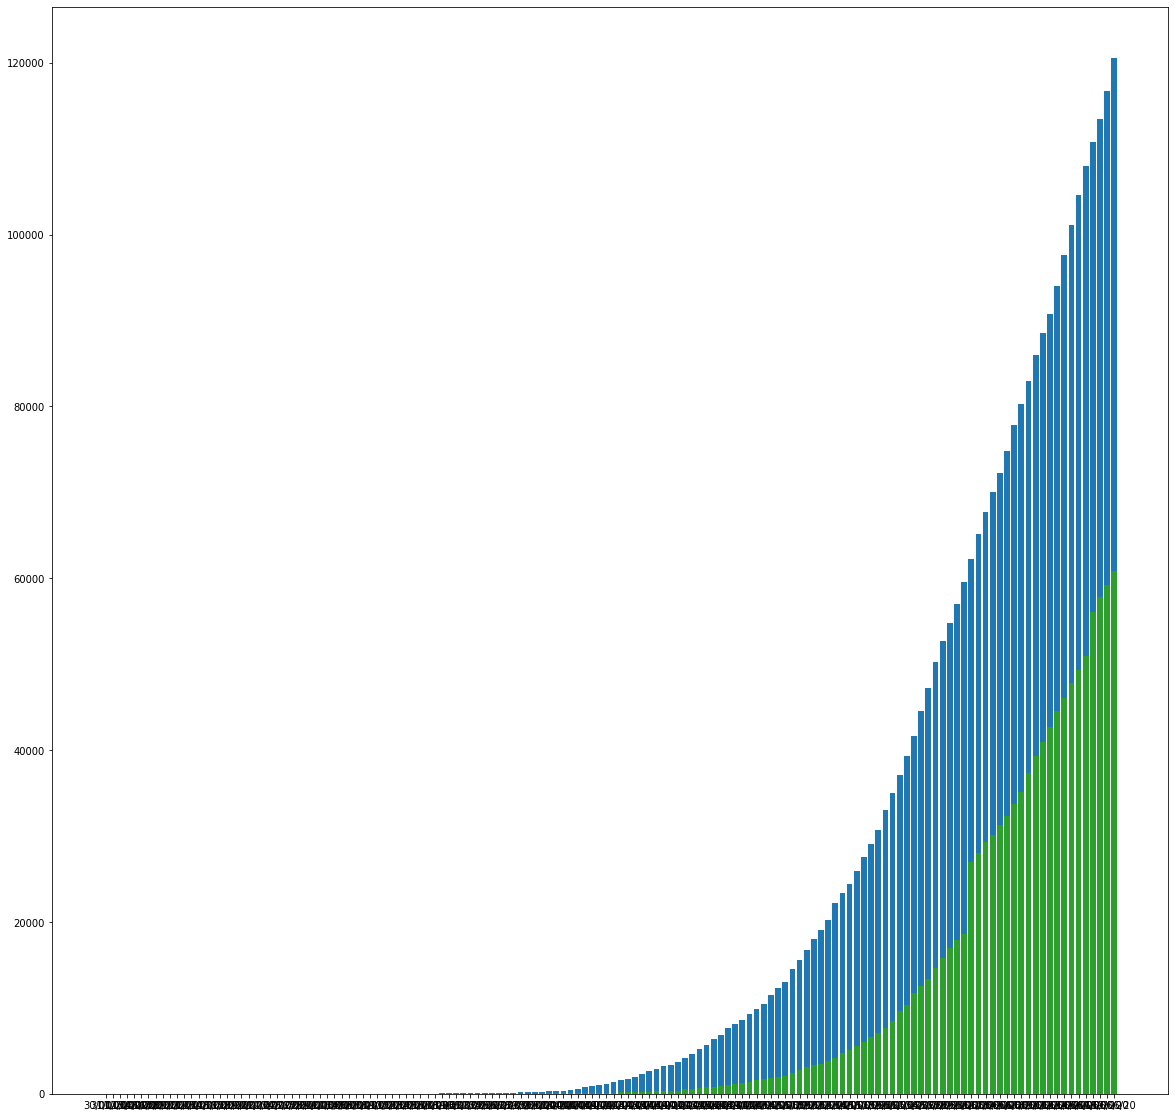

NameError: name 'Confirmed' is not defined

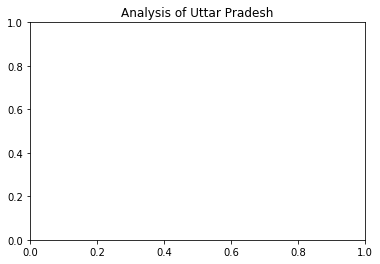

In [66]:
plt.figure(figsize=(20, 20))
plt.bar(covid['Date'], covid['Confirmed'], l)
plt.bar(covid['Date'], covid['Deaths'])
plt.bar(covid['Date'], covid['Cured'])
plt.show()
plt.title("Analysis of Uttar Pradesh")
plt.legend(Confirmed, Deaths,Cured, title="Covid'19", bbox_to_anchor=(1, 0, 0.5, 1))

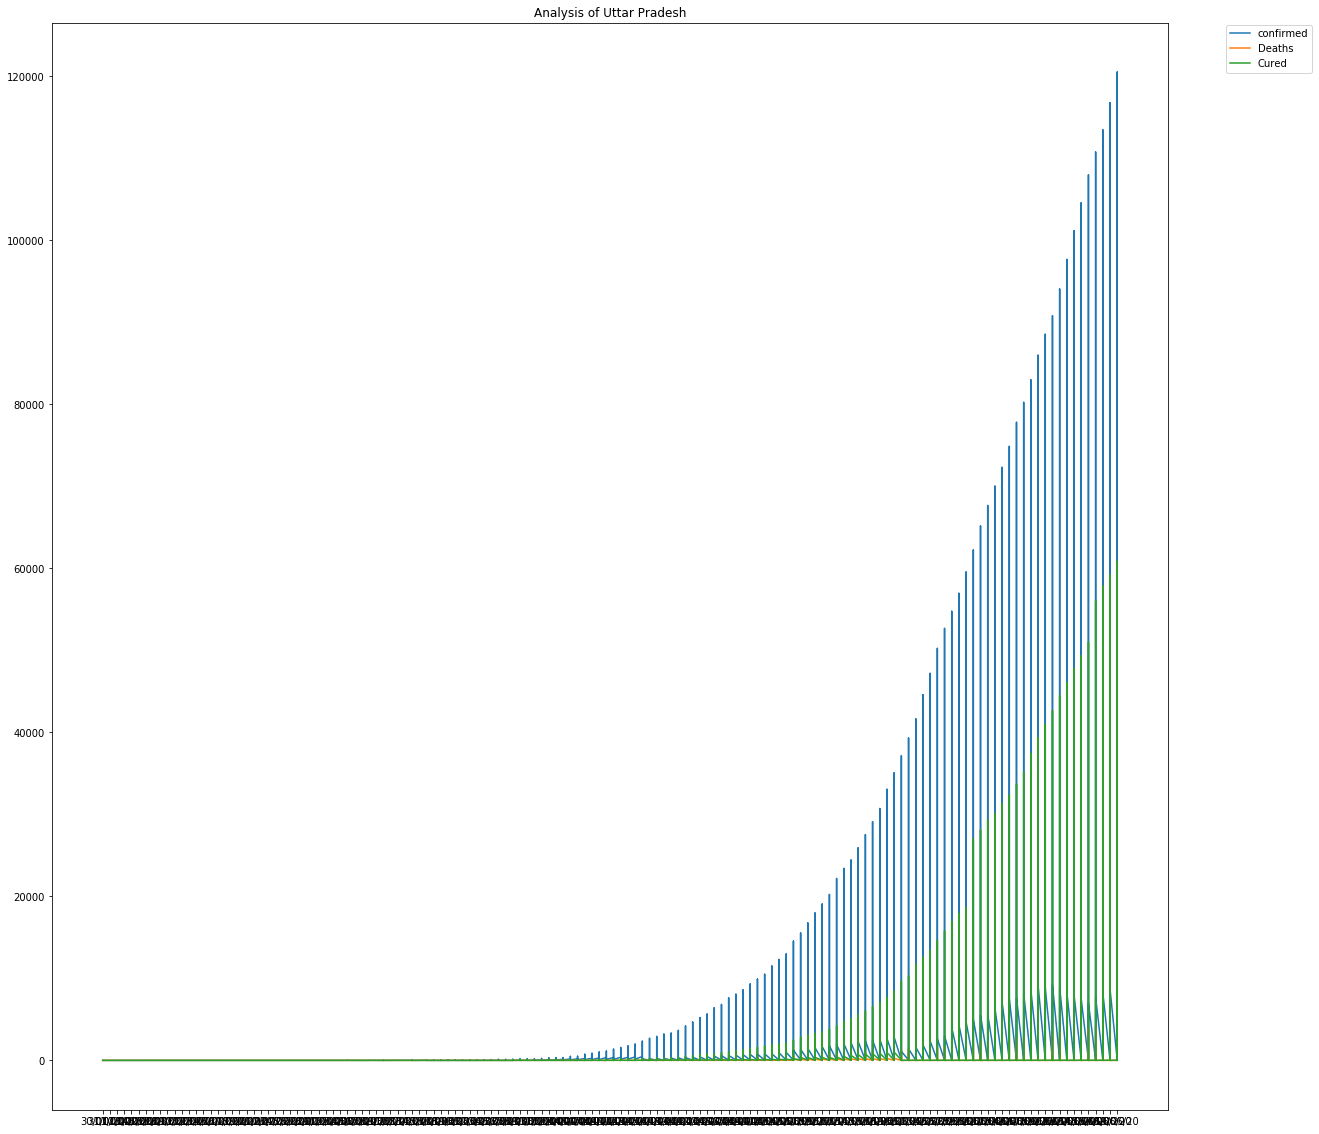

In [75]:
plt.figure(figsize=(20, 20))
plt.plot(covid['Date'], covid['Confirmed'], label = "confirmed")
plt.plot(covid['Date'], covid['Deaths'], label = 'Deaths')
plt.plot(covid['Date'], covid['Cured'], label = 'Cured')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', borderaxespad=0.2)
plt.title('Analysis of Uttar Pradesh')
plt.show()